<div style="background-image: linear-gradient(rgb(50,150,250),white)">
    
## Ellective project submission   

    
<t> _____________             by, 
    Sudhir Behera
    
    
    

<div style="background-image: linear-gradient(white,rgb(100,200,300))">

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split

# Packages and libraries for model building.
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

# Metrics packages to evaluate models 
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn import metrics 
# Hyperparameter tuning 
from sklearn.model_selection import GridSearchCV
# control warnings
import warnings 
warnings.filterwarnings('ignore')

## Data Overview

- Observations
- Sanity checks

### Loading data

In [107]:
data = pd.read_csv(r'C:\Users\fricle\Great_learning\Projects\DATA\ExtraaLearn.csv')

In [108]:
df = data.copy()

In [109]:
r,c = df.shape
print('There are {},rows and {}, columns in the data set.'.format(r,c))

There are 4612,rows and 15, columns in the data set.


In [110]:
df.sample(10)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
1570,EXT1571,60,Unemployed,Mobile App,High,1,545,2.213,Email Activity,No,No,No,No,No,0
1530,EXT1531,58,Unemployed,Mobile App,High,1,411,1.411,Email Activity,No,No,No,No,No,0
4346,EXT4347,57,Professional,Mobile App,Medium,1,1319,2.196,Phone Activity,No,No,No,Yes,No,0
1053,EXT1054,55,Professional,Mobile App,High,3,58,3.749,Phone Activity,No,No,No,No,No,0
2407,EXT2408,49,Professional,Mobile App,High,5,323,2.254,Email Activity,No,No,No,No,No,0
2156,EXT2157,51,Unemployed,Website,Medium,3,1,0.000,Email Activity,No,No,No,No,No,0
3517,EXT3518,58,Professional,Mobile App,Low,4,122,2.119,Website Activity,No,No,No,No,No,0
1332,EXT1333,22,Student,Website,Medium,2,307,5.315,Phone Activity,No,No,No,No,No,0
2959,EXT2960,57,Unemployed,Mobile App,High,3,1750,2.061,Phone Activity,No,No,No,No,No,1
1274,EXT1275,55,Professional,Website,Medium,1,1288,2.083,Email Activity,No,No,No,No,No,1


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
    
 - The dataset has 4612 rows and 15 columns.    
 - ID, current_occupation, first_interaction, profile_completed, last_activity, print_media_type1,        
   print_media_type2, digital_media , educational_channels and referral are of **obeject** type.       
 - age, website_visits, time_spent_on_website, page_views_per_visit and status are of **numeric** data type.       
 - There are no null values in the dataset.     

ID column is an identifier. Let's check if each entry of the column is unique.    


In [112]:
df.ID.nunique()

4612

<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'">
<h3> Observations</h3>

* Every entry is unique, this data would not help in our predictions. Let us remove it from the <br>
  dataset. 


### Removing ID 


In [113]:
del df['ID']

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 504.6+ 

<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'">
<h3> Observations</h3>

* You could see **ID** column is removed from the dataset. 


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

<div style="background-image: linear-gradient(rgb(200,189,255), white);font-family: 'Segoe UI';font-size:'25'">
<h3> User defined classes and functions.</h3>

**plotGraph,** has follwing methods. <br> 

  * **countPlot(ds,f):** Uses seaborn module to generate count plot graph.  
    
  * **plotBox(ds,f,axes):** Uses seaborn module to generate box plot graph. 
    
  * **plotHeatmap(ds,size):** Uses seaborn module to generate heatmap matrix. 
    
  * **plotDist(ds,i,axes):** Uses seaborn module to generate distribution graph. 
    
  * **plotScatter(x,y,c):** Uses seaborn module to generate scatter plot.  
    
  * **plotPie(ds_size,i):** Generates pie plots.   
    
  * **plotPairs(ds):** Uses seaborn module to generate pair plot.
    
  * **plotLine(x,y,x_1,y_1):** Uses seaborn module to plot line chart.   

In [115]:
class plotGraph:
    @staticmethod 
    def plotCount(ds,x,order,hue_parm, palette):
        plt.figure(figsize = (7, 3))
        ax = sns.countplot(data=df,x=x,order=order,hue=hue_parm,palette=palette)
        sns.move_legend(ax, "upper center")
        total = len(ds[x])
        for container in ax.containers:
            ax.bar_label(container)
    @staticmethod
    def plotBox(ds,lst,f,axes):
        sns.boxplot(data=ds,x=lst[f],ax=axes,color='brown')
    @staticmethod    
    def plotHeatmap(ds,size):
        if size == 'small':
           plt.figure(figsize = (3, 2))
        else:
            plt.figure(figsize = (8, 5))
        sns.heatmap(ds, annot = True, fmt = '0.2f', cmap='Greys',linewidths=0.30)
    @staticmethod    
    def plotDist(ds,i,axes):
        sns.distplot(ds[numericals[i]], ax=axes, color="k", bins=10)
    @staticmethod     
    def plotScatter(x,y,c):
        plt.figure(figsize = (6, 4))
        sns.scatterplot(x=x,y=y,marker='o',s=25, hue=y, palette=c, legend=False)
    @staticmethod    
    def plotPie(ds_size,i):
        pct_label =  lambda x: f'{x:.0f}%\n({(x/100)*sum(ds_size):.0f})'
        v_counts = ds_size.value_counts()
        ds_size.plot(ax=axe[i], kind='pie', colors=('k', 'brown', 'grey'), textprops={'color':"c",'fontsize':12},
                     autopct=pct_label, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'w' })   
    @staticmethod
    def plotPairs(ds):
         sns.pairplot(ds,
                 markers="o",
                 hue='status')
    @staticmethod
    def plotLine(x,y,x_1,y_1):
        plt.figure(figsize = (10, 4))
        ax = sns.lineplot(x=x_1, y=y_1, color='green',marker='*', label = "successfully converted", linestyle="-.")
        ax = sns.lineplot(x=x, y=y, color='brown',marker='*', label = "total interactions")
        sns.move_legend(ax, "upper center")
        for xy in zip(x, y):
            ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
        for xy in zip(x_1, y_1):
            ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')               

In [116]:
# Creates the class object to plot various graphs. 
gr = plotGraph()

In [117]:
# Setting the graph style.
sns.set_style("darkgrid", {"axes.facecolor": ".6"})
sns.set_context("paper", font_scale=1.0, rc={"lines.linewidth": 2.5})

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

### Q1: Find out how current occupation affects lead status.

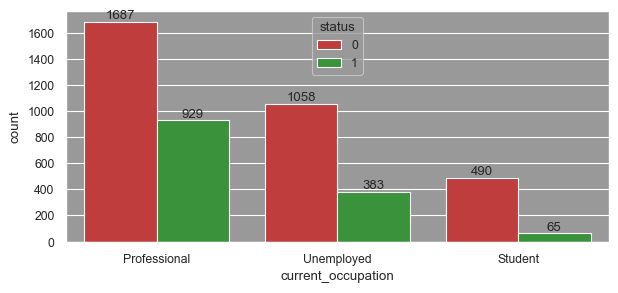

In [118]:
x="current_occupation"
palette = ['tab:red', 'tab:green']
order=df[x].value_counts().index 
hue='status'
gr.plotCount(df,x,order,hue,palette)

In [119]:
professionas = round((929/(1687+929))* 100,1) 
unemployed = round((383/(1058+383))* 100,1) 
student = round((65/(490+65))* 100,1) 
print('total count, professionas_conv_rate:',str(1687+929)+',   ' + str(professionas))
print('total count,unemployed_conv_rate:',str(1058+383) + ",   " + str(unemployed))
print('total count, student_conv_rate:',str(490+65) + ',   ' + str(student))

total count, professionas_conv_rate: 2616,   35.5
total count,unemployed_conv_rate: 1441,   26.6
total count, student_conv_rate: 555,   11.7


<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
    
 - There are **2616** leads who are **professionas**. Out of which **929** became **paid members**. Approx **35.5 %** conversion rate.
 - There are **1441** leads who are **unemployed**.Out of which **383** became **paid members**. Approx **26.6%** conversion rate.
 - There are **555** leads who are **students**.Out of which **65** became paid members. Approx **11.7 %** conversion rate. 

### Q2: Do the first channels of interaction have an impact on the lead status?

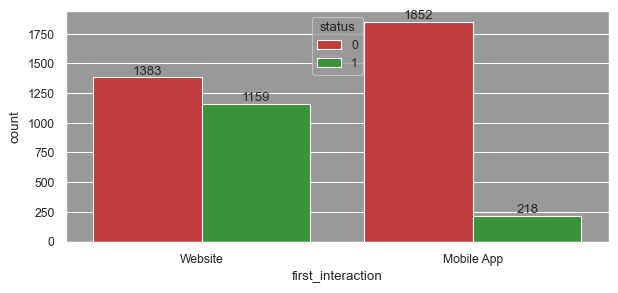

In [120]:
x="first_interaction"
palette = ['tab:red', 'tab:green']
order=df[x].value_counts().index
hue='status'
gr.plotCount(df,x,order,hue,palette)

In [121]:
Website = round((1159/(1383+1159))* 100,1) 
Mobileapp = round((218/(218+1852))* 100,1) 
print('Website_total_counts',(1383+1159))
print('Website_conv_rate,',Website)
print('Mobileapp_total_counts',(218+1852))
print('Mobileapp_conv_rate,',Mobileapp)

Website_total_counts 2542
Website_conv_rate, 45.6
Mobileapp_total_counts 2070
Mobileapp_conv_rate, 10.5


<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'"> 
    <h3> Observations</h3>

- There are **2542** leads whose first interaction was **Website**. Out of which **1159** became **paid members**. Approx **45.6 %** conversion rate.
 - There are **2070** leads whose first interaction was **Mobile App**.Out of which **218** became **paid members**. Approx **10.5 %** conversion rate.   
   

### Q3: Let us find out which mode of interaction works best?

**ExtraaLearn** interaction is captured by feature **last_activity.**

Using three modes 
 - Email Activity
 - Phone Activity
 - Website Activity

In [122]:
df.groupby('last_activity')['status'].value_counts()

last_activity     status
Email Activity    0         1587
                  1          691
Phone Activity    0          971
                  1          263
Website Activity  0          677
                  1          423
Name: status, dtype: int64

In [123]:
conv_rate_email = (691/(1587+691)) * 100 
conv_rate_phone = (263/(971+263)) * 100 
conv_rate_website = (423/(677+423)) * 100
print('total_counts_email,' ,(1587+691))
print('conv_rate_email,' ,str(round(conv_rate_email,1)) + '%')
print('total_counts_phone,' ,(971+263))
print('conv_rate_phone,' ,str(round(conv_rate_phone,1)) + '%')
print('total_counts_website,' ,(677+423))
print('conv_rate_website,', str(round(conv_rate_website,1)) + '%')

total_counts_email, 2278
conv_rate_email, 30.3%
total_counts_phone, 1234
conv_rate_phone, 21.3%
total_counts_website, 1100
conv_rate_website, 38.5%


<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'"> 
    <h3> Observations</h3>

- In raw number, successful conversion from **email** interactions is the highest with **691** out of 2278 leads.
- **conversion rate** from **website** is the highest with **38.5%**.

### Q4: Let's find out which of these channels have the highest lead conversion rate?

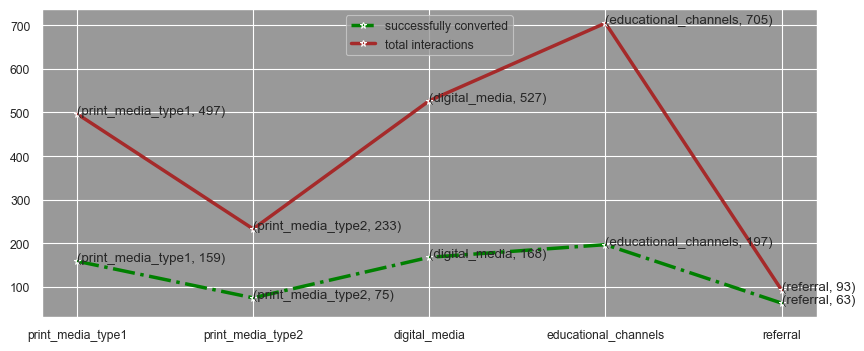

In [124]:
modes_of_interaction = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']
total_interactiion = {}
total_conversions = {}
for i,c in enumerate(modes_of_interaction):
    total_interactiion[c] = df[df[c] == 'Yes'].count()[0] 
    total_conversions[c] = df[(df[c] == 'Yes') & (df['status'] == 1)] .count()[0] 
x = total_interactiion.keys()
y = total_interactiion.values()
x_1  = total_conversions.keys()
y_1 = total_conversions.values()

gr.plotLine(x,y,x_1,y_1)

In [125]:
# Let use calculate coversion rate for each of these channels.
print_media_type1_r = (159/497) * 100
print_media_type2_r = (75/233) * 100
digital_media_r = (168/527) * 100
educational_channels_r = (197/705) * 100
referral_r = (63/93) * 100
print('educational_channels_r,', round(educational_channels_r,1))
print('print_media_type1_r,', round(print_media_type1_r,1))
print('print_media_type2_r,', round(print_media_type2_r,1))
print('digital_media_r,', round(digital_media_r,1))
print('referral_r,', round(referral_r,1))

educational_channels_r, 27.9
print_media_type1_r, 32.0
print_media_type2_r, 32.2
digital_media_r, 31.9
referral_r, 67.7


<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'"> 
    <h3> Observations</h3>
    
    
- **705**  total leads from **educational_channels**.    
    out of which **197** are successfully converted.   
    ` converion rate: 27.9%`
    
- **527** total leads from **digital_media**   
    out of which **168** are successfully converted.   
    ` converion rate: 31.9% `    
- **497** total leads from **print_media_type1**   
    out of which **159** are successfully converted.   
    ` converion rate: 32.0% `
- **233** leads from **print_media_type2**   
    out of which **75** are successfully converted.   
    ` converion rate: 32.02% `
- **93** leads from **referals**  
    out of which **63** are successfully converted.   
    ` converion rate: 67.7% `
    
 You can see **referrals** has the `**highest**` **conversion rate**.

### Q5: Does having more details about a prospect increase the chances of conversion?

We can as answer this by checking **profile_completed**.

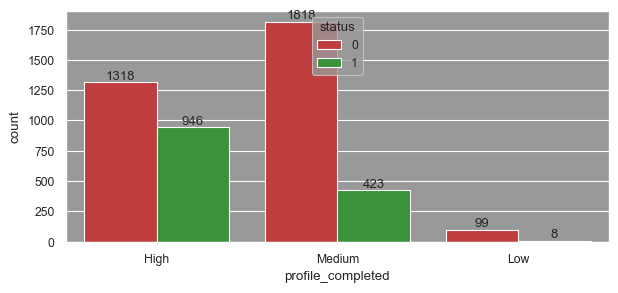

In [126]:
x="profile_completed"
palette = ['tab:red', 'tab:green']
order=df[x].value_counts().index 
hue='status'
gr.plotCount(df,x,order,hue,palette)

In [127]:
(946/(1318+946))*100

41.784452296819794

<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'"> 
    <h3> Observations</h3>
    
    
- You can clearly see the leads who have **High** level of profile completion  majority of them converted to become paid members.   Leads with High level profile completion are 2264 in totals and out of which 946 converted, with a conversion rate of 41.8%.
    
  So, capturing more information about the leads really **helps**. 


### Checking the summary statistics

In [128]:
# Selecting numerical columns and checking the summary statistics
num_cols = df.select_dtypes('number').columns
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'">    
<h3> Observations</h3>
 
 **Age** 
 > Average age of the leads is approx **46.2** years.  
 > Minimum age of the leads is **18** years.   
 > Maximum age of the leads is **63** years.    
 > Median age is 51.          
 
**website_visits**     
 > on average **3.56** visits.   
 > minimum number of visits by a lead is **zero**.        
 > maximum number of visits by a lead is **30**.    
    
**time_spent_on_website**  
 > on average **724.01**  time spent on website.     
 > minimum number of time spent on website by a lead is **zero**.        
 > maximum number of time spent on website by a lead is **2537 seconds**.   
     
**page_views_per_visit**   
 > on average **3.026**  page views per visit.     
 > minimum number of time spent on website by a lead is **zero**.       
 > maximum number of time spent on website by a lead is **18.434**.   

### Checking numerical columns distribution and outliers.


In [129]:
numericals = df.select_dtypes(['number']).columns.tolist()

In [130]:
print(numericals)

['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'status']


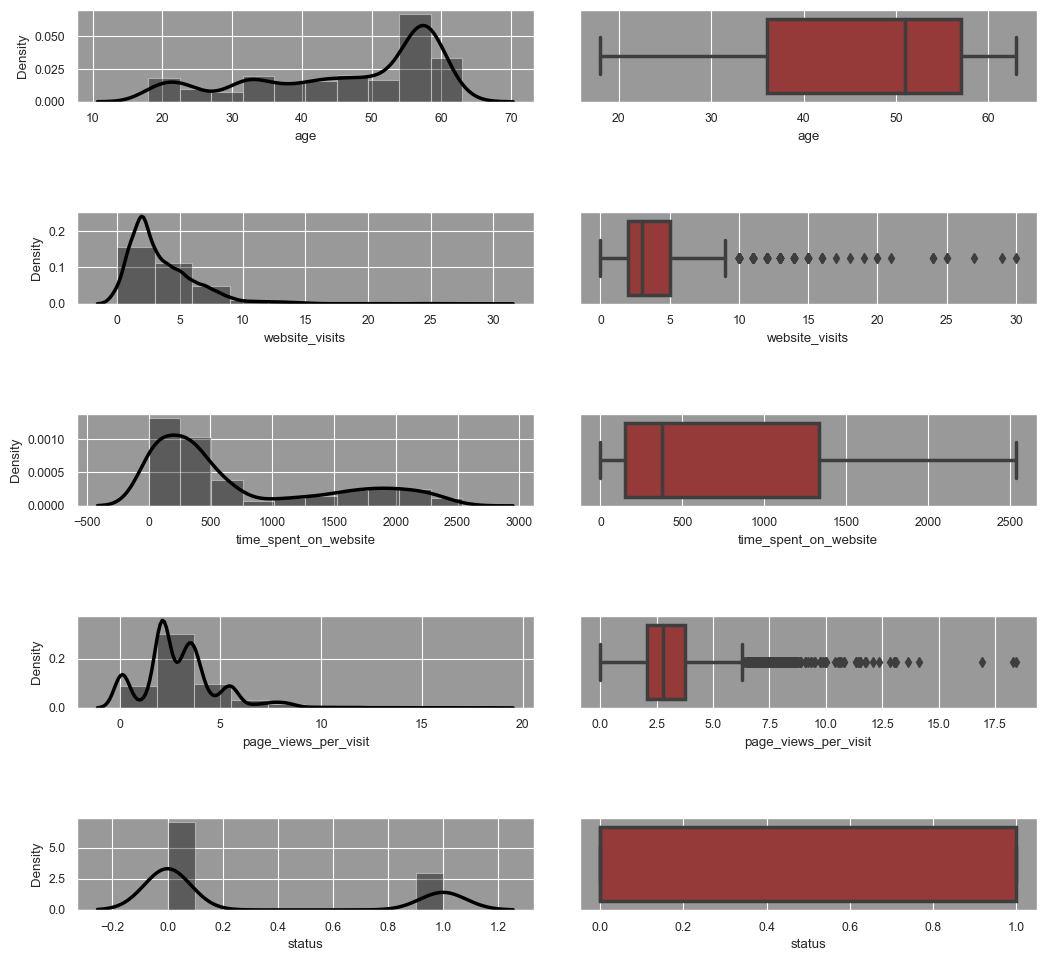

In [131]:
fig, axes = plt.subplots(5, 2, figsize=(12, 10))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
for i, c in enumerate(numericals):
    gr.plotDist(df,i,axes[i,0])   
    gr.plotBox(df,numericals,i,axes[i,1])

<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'"> 


<h3> Observations</h3>
       
-  **age** is left-skewed. No outliers. **Median** is around **51**.
      
- **website_visits** is right-skewed. There are many **outliers**, those need treatment. **Median** is around **3** visits.
      
-  **time_spent_on_website** is right-skewed, but no outliers. Lots of leads spent no time atall( zero). Median value is around **376**. 
- **page_views_per_visit** has many **outliers**. which needs treatment. **Median** is around **2.8** visits.
     
- **status** is a **binary feature**. Later we shall check it's distribution. 

### Checking categorical columns' distribution.

In [132]:
categories = df.select_dtypes(['object']).columns.tolist()

In [133]:
print(categories)

['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']


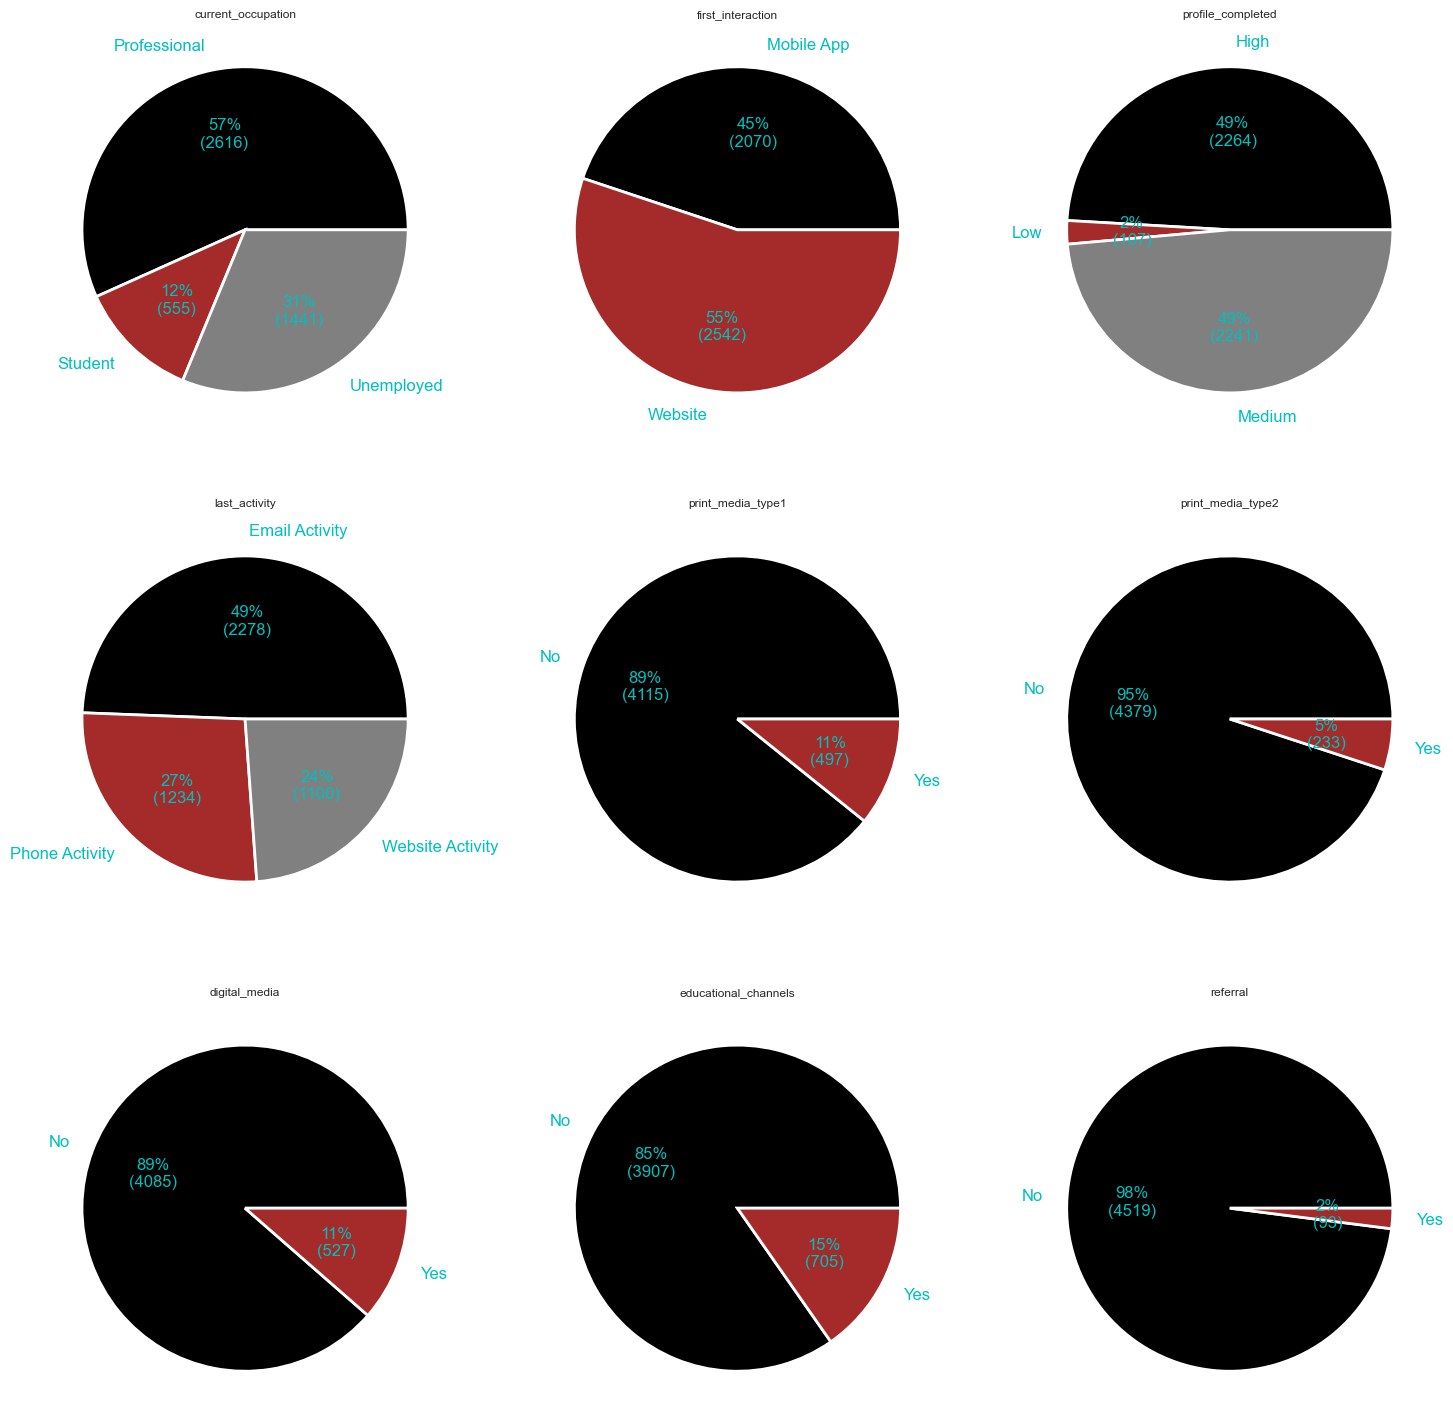

In [134]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axe = axes.ravel()
sns.set_context("paper", font_scale=.9,rc={"lines.linewidth": 2.5})
# assign the plot to each subplot in axe
for i, c in enumerate(categories):
    axe[i].set_title(categories[i])
    ds_size = df.groupby(categories[i]).size()
    gr.plotPie(ds_size,i)

<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'"> 
<h3> Observations</h3>  
    
- **current_occupation,** has **57%** professional, **12%** student and **31%** unemployed of the total samples.   
- **first_interaction,**  has **45%** leads from Mobile Apps, **55%** from  Websites.   
- **profile_completed,**  has **49%** completed **high**, **49%** **medium** and **2%** **low**.   
- **last_activity,** has **49%** for Email Activity , **24%** for Website Activity and **27%** for Phone Activity.
- **print_media_type1,** generated **11%** leads.  
- **print_media_type2,** generated **5%** leads.  
- **digital_media,**  generated **11%** leads. 
- **educational_channels,** generated **15%** leads. 
- **referral,** generated **2%** leads.

### Checking imbalance of orginal data. 

In [135]:
df.status.value_counts(normalize=True)

0    0.701431
1    0.298569
Name: status, dtype: float64

<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'"> 

<h3> Observations</h3>
    
 - There is approx 70-30 split between class **0**  and class **1**.



### Bivariate analysis

#### Let us find correlations between all the variables.

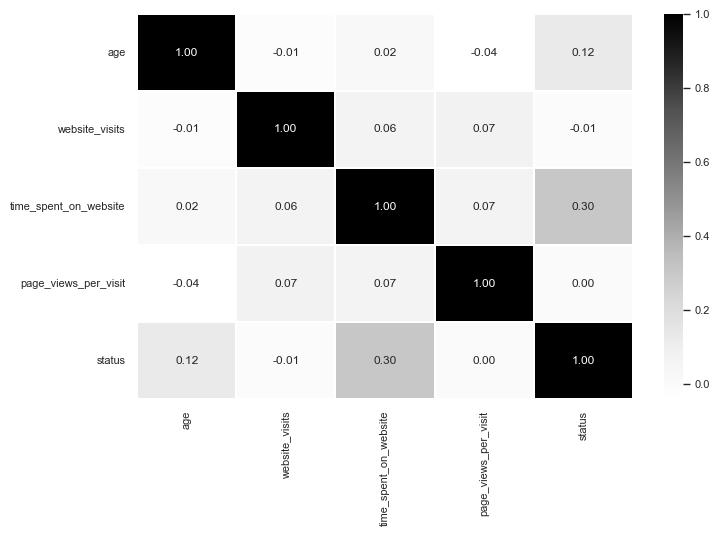

In [136]:
gr.plotHeatmap(df.corr(),'large')

<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
    
**possitive correlations**   
  > - time_spent_on_website **and** status   
  > - age **and** status   
  > - referral **and** status
  > - website_visits **and** page_views_per_visit   
  > - time_spent_on_website **and** page_views_per_visit   
  > - time_spent_on_website **and** website_visits     
   
**negative correlations** 
  > - age **and** page_views_per_visit    
  > - website_visits **and** age     
 
   

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### let us check for any **missing values.**

In [137]:
df.isnull().sum()

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'"> 


<h3> Observations</h3>
    
    
- All counts are **0** therefore, no missing values in the dataset. 

### Let us encode 'Yes' and 'No' values from all binary columns.

In [138]:
print(df.print_media_type1.unique())
print(df.print_media_type2.unique())
print(df.digital_media.unique())
print(df.educational_channels.unique())
print(df.referral.unique())

['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']


In [139]:
df.print_media_type1 = df.print_media_type1.apply(lambda x: 1 if x == 'Yes' else 0)
df.print_media_type2 = df.print_media_type2.apply(lambda x: 1 if x == 'Yes' else 0) 
df.digital_media = df.digital_media.apply(lambda x: 1 if x == 'Yes' else 0) 
df.educational_channels= df.educational_channels.apply(lambda x: 1 if x == 'Yes' else 0) 
df.referral = df.referral.apply(lambda x: 1 if x == 'Yes' else 0) 

In [140]:
df.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,1,0,1,0,0,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,0,0,0,1,0,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,0,0,1,0,0,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,0,0,0,0,0,1
4,23,Student,Website,High,4,600,16.914,Email Activity,0,0,0,0,0,0


### Let us treat the outliers from 
* website_visits 
* page_views_per_visit

let us treat **website_visits**

Earleir boxplot showed that there are outliers on right sides.  There are many observations are far away from the rest of the values. We can treat this by clipping the value to the upper whisker (Q3 + .5 * IQR).

In [141]:
Q1 = 0
Q2 = 0
IQR = 0
# Calculating the 25th quantile
Q1 = data["website_visits"].quantile(0.25)
# Calculating the 75th quantile
Q3 = data["website_visits"].quantile(0.75)
# Calculating IQR
IQR = Q3 - Q1
# Calculating value of upper whisker
Upper_Whisker = Q3 +.5 * IQR
print(IQR)
print(Q3)
print(Upper_Whisker)

3.0
5.0
6.5


In [142]:
# Assigning the value of upper whisker to outliers
df.loc[df["website_visits"] >= 10.0, "website_visits"] = Upper_Whisker

let us treat **page_views_per_visit**

Earleir boxplot showed that there are outliers on right sides.  There are many observations are far away from the rest of the values. We can treat this by clipping the value to the upper whisker (Q3 + 1.5 * IQR).

In [143]:
Q1 = 0
Q2 = 0
IQR = 0
# Calculating the 25th quantile
Q1 = data["page_views_per_visit"].quantile(0.25)
# Calculating the 75th quantile
Q3 = data["page_views_per_visit"].quantile(0.75)
# Calculating IQR
IQR = Q3 - Q1
# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
print(IQR)
print(Q3)
print(Upper_Whisker)

1.6784999999999997
3.7562499999999996
6.273999999999999


In [144]:
# Assigning the value of upper whisker to outliers
df.loc[df["page_views_per_visit"] >= 5.0, "page_views_per_visit"] = Upper_Whisker

Let us draw the **boxplot** and verify.

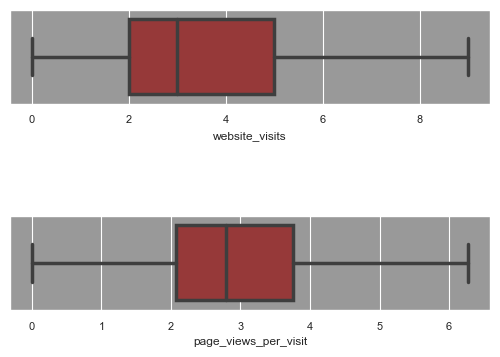

In [145]:
fig, axes = plt.subplots(2, 1, figsize=(6, 3))
plt.subplots_adjust(left=0.1, bottom=0.0, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
treatment = ["website_visits","page_views_per_visit"]
#axe[1].set_title(treatment[0])  
gr.plotBox(df,treatment,0,axes[0])
gr.plotBox(df,treatment,1,axes[1])

<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'"> 


<h3> Observations</h3>
    
    
- You can see that there are **no outliers.** 

In [146]:
# Separating the target variable and other variables
X = df.drop(columns = 'status')
Y = df['status']

In [147]:
print(X['current_occupation'].unique())
print(X['profile_completed'].unique())

['Unemployed' 'Professional' 'Student']
['High' 'Medium' 'Low']


In [148]:
# Creating dummy variables, drop_first = True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first = False)

In [149]:
print(X['current_occupation_Unemployed'].unique())
print(X['current_occupation_Professional'].unique())
print(X['current_occupation_Student'].unique())
print(X['profile_completed_High'].unique())
print(X['profile_completed_Medium'].unique())
print(X['profile_completed_Low'].unique())

[1 0]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]


In [150]:
# Splitting the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

## Building a Decision Tree model

In [151]:
# Fitting the decision tree classifier on the training data
d_tree =  DecisionTreeClassifier(random_state = 1)
d_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [152]:
# Function to print classification report and get confusion matrix in a proper format

def metrics_score(metrics_df, model_id, train_or_test, actual, predicted):
    precision,recall,fscore,support = score(actual,predicted,average='macro')
    metrics_dict = {'model_id': model_id,
                    'train_or_test': train_or_test,
                    'f1-score': fscore,
                    'precision' :precision,
                    'recall' :recall 
                }
    metrics_df = metrics_df.append(metrics_dict,ignore_index=True)
    print('                          ')
    print('                          MODEL SCORES')
    print('                          ')
    print(metrics_df.iloc[::-1])
    print('                                ')
    print('                         CONFUSION MATRIX')
    cm = confusion_matrix(actual, predicted)
    gr.plotHeatmap(cm,'small')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    return metrics_df

## Model Performance evaluation and improvement

In [153]:
from sklearn.metrics import precision_recall_fscore_support as score
# initialzing a df to capture metrics scores.
metrics_dict = {}
metrics_df = pd.DataFrame.from_dict(metrics_dict)

                          
                          MODEL SCORES
                          
            model_id train_or_test  f1-score  precision  recall
0  model_1_tree_orig         Train       1.0        1.0     1.0
                                
                         CONFUSION MATRIX


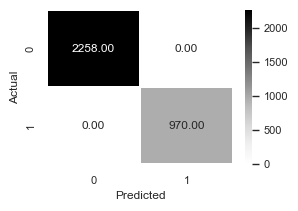

In [154]:
# Checking performance on the training data.
# Note: Top row from the 'MODEL SCORES' is from this run. 
Y_pred_train1 = d_tree.predict(X_train)
metrics_df = metrics_score(metrics_df,'model_1_tree_orig','Train', Y_train, Y_pred_train1)

<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
    
* This model is performiang to the perfection. Most likely overfitting on the training dataset.  
* there are no false positives or false negatives. 
    
Reading confusion matrix (clockwise rom bottom right square):
 
  0 : Negative class ( does not convert).
  1 : Positive class ( convert)
    
**True Positive:** Predicting the lead will convert to become paid member and the lead actually converted.   
**False Negative:** Predicting the lead will not convert to become paid member and the lead actually converted.    
**True Negative:** Predicting the lead will not convert to become paid member and the lead actually did not convert.   
**False Positive:** Predicting the lead will convert to become paid member and the lead actually did not convert.   

                          
                          MODEL SCORES
                          
            model_id train_or_test  f1-score  precision    recall
1  model_1_tree_orig          Test  0.754269   0.754638  0.753905
0  model_1_tree_orig         Train  1.000000   1.000000  1.000000
                                
                         CONFUSION MATRIX


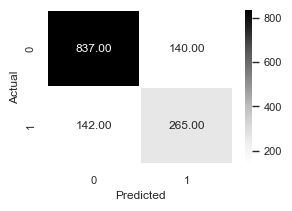

In [155]:
# Checking performance on the testing data
# Note: Top row from the 'MODEL SCORES' is from this run. 
Y_pred_test1 = d_tree.predict(X_test)
metrics_df = metrics_score(metrics_df, 'model_1_tree_orig','Test',Y_test, Y_pred_test1)

<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>

* You can see f1-score is much lower than the score from training dataset. This model is overfitting and  
    we shall ignore this model for consideration. 
* there are quite a lot false positives and and false negatives. 

### Decision Tree - Hyperparameter Tuning

We will use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is approximately the opposite of the imbalance in the original data.

This would tell the model that 1 is the important class here.

In [156]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})
# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 12), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [2,3,4,5,7,8,9]
             }
# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)
# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, Y_train)
# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_
# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=5, min_samples_leaf=3, random_state=7)

                          
                          MODEL SCORES
                          
             model_id train_or_test  f1-score  precision    recall
2  model_2_tree_tuned         Train  0.825392   0.813372  0.854064
1   model_1_tree_orig          Test  0.754269   0.754638  0.753905
0   model_1_tree_orig         Train  1.000000   1.000000  1.000000
                                
                         CONFUSION MATRIX


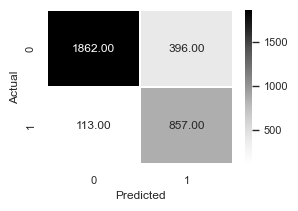

In [157]:
# Checking performance on the training data
# Note: Top row from the 'MODEL SCORES' is from this run.
Y_pred_train2 = d_tree_tuned.predict(X_train)
metrics_df = metrics_score(metrics_df, 'model_2_tree_tuned','Train',Y_train, Y_pred_train2)

<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
    
* Tuning definiely working here. F1-score improved to 0.825392. So as precission and recall. 
  let us check now on the test data.
    
* there a few false positives and false negatives.

                          
                          MODEL SCORES
                          
             model_id train_or_test  f1-score  precision    recall
3  model_2_tree_tuned          Test  0.816881   0.804461  0.846558
2  model_2_tree_tuned         Train  0.825392   0.813372  0.854064
1   model_1_tree_orig          Test  0.754269   0.754638  0.753905
0   model_1_tree_orig         Train  1.000000   1.000000  1.000000
                                
                         CONFUSION MATRIX


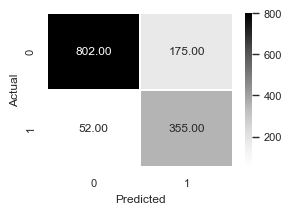

In [158]:
# Checking performance on the testing data
# Note: Top row from the 'MODEL SCORES' is from this run. 
Y_pred_test2 = d_tree_tuned.predict(X_test)
metrics_df = metrics_score(metrics_df, 'model_2_tree_tuned','Test',Y_test, Y_pred_test2)

<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
    
* f1-score also improved and balanced with train data. This model is a good candidate for our final model.   
* there are few false positives and false negatives. 

### Let us visualize the tuned decission tree. 

It is hard to visualize and interpret the tree with depth = 9, We can reduce the depth to 3 and visualize it.


In [159]:
tree_model = DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.7}, max_depth = 3,
                       min_samples_leaf = 10, random_state = 7)

# Fit the best algorithm to the data
tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=3,
                       min_samples_leaf=10, random_state=7)

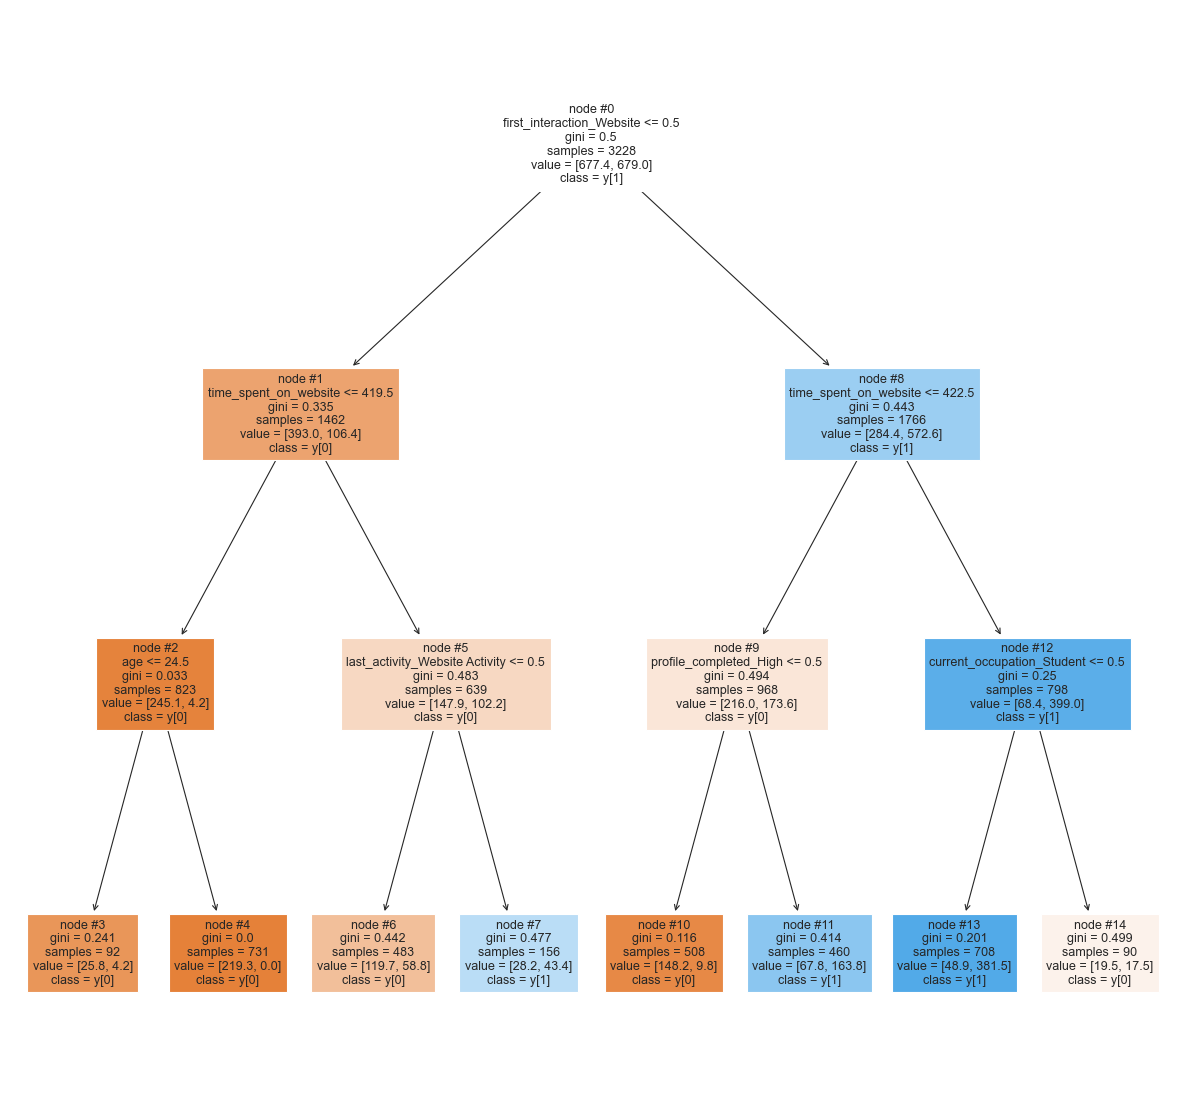

In [160]:
features = list(X.columns)
plt.figure(figsize = (15, 14))
tree.plot_tree(tree_model, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)
plt.show()

<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
    
- Blue nodes are where the leads likely to be converted as paid members(Y(1)). The orange nodes where the leads would not convertY(0).
- The first split of the decission tree is on **first_interaction_website**. Which implies that this feature is the most important factor in deciding leads will convert to paid members or not. 
- **more time** on spent on the website **more likely** to convert into paid membership. 
- Among leads whose first interaction was website , and spent more than 422.5 seconds and not students likey to be converted or positve class Y(1).  
Among leads whose first interaction was website , and spent less than 422.6 seconds but have **high level of profile completion** likey to be converted or positve class Y(1). 

#### Let's look at the feature importance of the tuned decision tree model.

In [161]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                      Imp
time_spent_on_website            0.291579
first_interaction_Website        0.260913
profile_completed_High           0.208888
current_occupation_Professional  0.070087
age                              0.034600
last_activity_Phone Activity     0.033452
profile_completed_Low            0.026287
last_activity_Website Activity   0.025844
page_views_per_visit             0.015623
current_occupation_Student       0.011411
website_visits                   0.006397
last_activity_Email Activity     0.006203
referral                         0.005126
current_occupation_Unemployed    0.003591
educational_channels             0.000000
first_interaction_Mobile App     0.000000
digital_media                    0.000000
print_media_type2                0.000000
print_media_type1                0.000000
profile_completed_Medium         0.000000


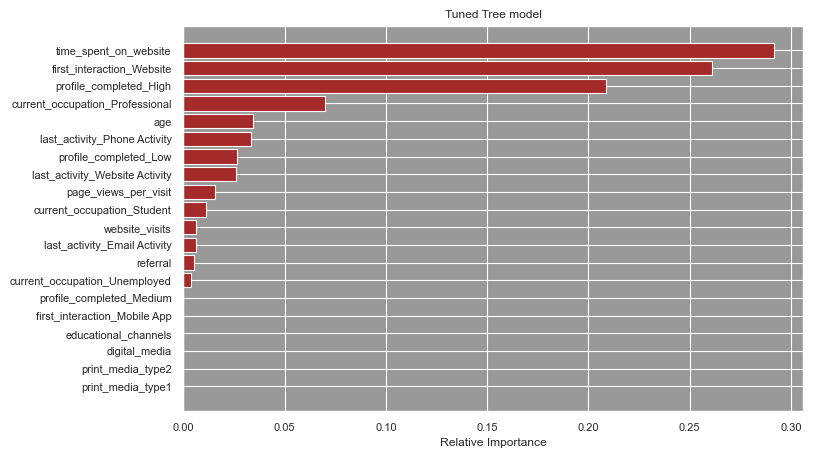

In [162]:
# Plotting the feature importance
importances_tree = d_tree_tuned.feature_importances_
indices_t = np.argsort(importances_tree)
plt.figure(figsize = (8, 5))
plt.title('Tuned Tree model')
plt.barh(range(len(indices_t)), importances_tree[indices_t], color = 'brown', align = 'center')
plt.yticks(range(len(indices_t)), [features[i] for i in indices_t])
plt.xlabel('Relative Importance')
plt.show()

<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
 
**Top 4 important features.**   
>time_spent_on_website   
>first_interaction_Website  
>profile_completed_High  
>current_occupation_Professional 
    
**Least important features**
> profile_completed_Medium  
> print_media_type1  
> print_media_type2  
> digital_media 

## Building a Random Forest model

In [163]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 7, criterion = "entropy")
rf_estimator.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

In [164]:
# Predict on the train data. 
Y_pred_train3 = rf_estimator.predict(X_train)

## Model Performance evaluation and improvement

                          
                          MODEL SCORES
                          
               model_id train_or_test  f1-score  precision    recall
4  model_3_randomF_orig         Train  1.000000   1.000000  1.000000
3    model_2_tree_tuned          Test  0.816881   0.804461  0.846558
2    model_2_tree_tuned         Train  0.825392   0.813372  0.854064
1     model_1_tree_orig          Test  0.754269   0.754638  0.753905
0     model_1_tree_orig         Train  1.000000   1.000000  1.000000
                                
                         CONFUSION MATRIX


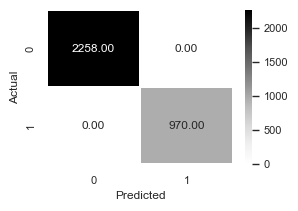

In [165]:
# Checking performance on the training data
# Note: Top row from 'MODEL SCORES' is from this run. 
metrics_df = metrics_score(metrics_df, 'model_3_randomF_orig','Train',Y_train, Y_pred_train3)

<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
    
- **This  random forest model** is giving a **perfect** performance on the training data   
This model is most likely overfitting to the training dataset.  

                          
                          MODEL SCORES
                          
               model_id train_or_test  f1-score  precision    recall
5  model_3_randomF_orig          Test  0.817990   0.831361  0.807748
4  model_3_randomF_orig         Train  1.000000   1.000000  1.000000
3    model_2_tree_tuned          Test  0.816881   0.804461  0.846558
2    model_2_tree_tuned         Train  0.825392   0.813372  0.854064
1     model_1_tree_orig          Test  0.754269   0.754638  0.753905
0     model_1_tree_orig         Train  1.000000   1.000000  1.000000
                                
                         CONFUSION MATRIX


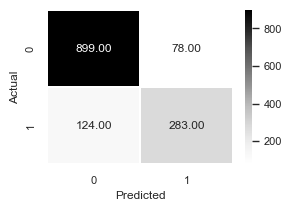

In [166]:
# Checking performance on the testing data
Y_pred_test3 = rf_estimator.predict(X_test)
metrics_df = metrics_score(metrics_df, 'model_3_randomF_orig','Test',Y_test, Y_pred_test3)

<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
    
- You can see f1-score is much lower on test data compared to train data. clearly model is overfitting on train data.
 We should ignore this model.  
- There are some false positives and false negatives. 

### Random Forest Classifier - Hyperparameter Tuning

Let's try tuning some of the important hyperparameters of the Random Forest Classifier.

We will not tune the criterion hyperparameter as we know from hyperparameter tuning for decision trees that entropy is a better splitting criterion for this data.

In [167]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [150, 180, 250, 260, 270],
    "max_depth": [3, 5, 6, 7, 10],
    "max_features": [0.5, 0.8,0.9, 1],
    "class_weight" : ["balanced",{0: 0.3, 1: 0.7}]
             }
# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)
# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, Y_train)
# Set the classifier to the best combination of parameters
rf_estimator_tuned_base = grid_obj.best_estimator_

In [168]:
# Fitting the best algorithm to the training data
rf_estimator_tuned_base.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features=0.5, n_estimators=260,
                       random_state=7)

                          
                          MODEL SCORES
                          
                model_id train_or_test  f1-score  precision    recall
6  model_4_randomF_tuned         Train  0.866546   0.855015  0.883954
5   model_3_randomF_orig          Test  0.817990   0.831361  0.807748
4   model_3_randomF_orig         Train  1.000000   1.000000  1.000000
3     model_2_tree_tuned          Test  0.816881   0.804461  0.846558
2     model_2_tree_tuned         Train  0.825392   0.813372  0.854064
1      model_1_tree_orig          Test  0.754269   0.754638  0.753905
0      model_1_tree_orig         Train  1.000000   1.000000  1.000000
                                
                         CONFUSION MATRIX


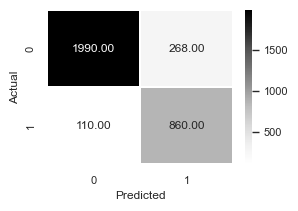

In [169]:
# Checking performance on the training data
# Note: Top row from the 'MODEL SCORES' is from this run.
Y_pred_train4 = rf_estimator_tuned_base.predict(X_train)

metrics_df = metrics_score(metrics_df, 'model_4_randomF_tuned','Train',Y_train, Y_pred_train4)

<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
    
- f1-score is much higher than the f1-score from Model_Tree_tuned( train ).  
- There are few false positives and false negatives. 

                          
                          MODEL SCORES
                          
                model_id train_or_test  f1-score  precision    recall
7  model_4_randomF_tuned          Test  0.826310   0.816186  0.841230
6  model_4_randomF_tuned         Train  0.866546   0.855015  0.883954
5   model_3_randomF_orig          Test  0.817990   0.831361  0.807748
4   model_3_randomF_orig         Train  1.000000   1.000000  1.000000
3     model_2_tree_tuned          Test  0.816881   0.804461  0.846558
2     model_2_tree_tuned         Train  0.825392   0.813372  0.854064
1      model_1_tree_orig          Test  0.754269   0.754638  0.753905
0      model_1_tree_orig         Train  1.000000   1.000000  1.000000
                                
                         CONFUSION MATRIX


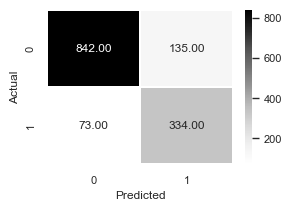

In [170]:
# Checking performance on the test data
Y_pred_test4 = rf_estimator_tuned_base.predict(X_test)
metrics_df = metrics_score(metrics_df, 'model_4_randomF_tuned','Test',Y_test, Y_pred_test4)

<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
    
 - f1-score is much higher than the f1-score from Model_Tree_tuned( test ).    
 
 This model seems to be the right choice for our final model. 

### Let us check feature importance of the above tuned RF model

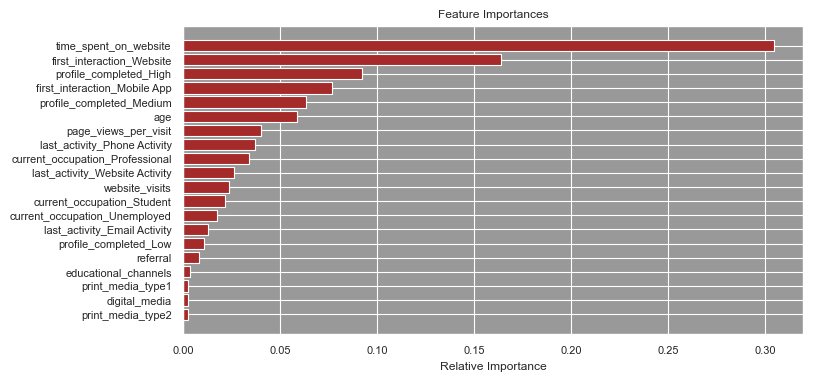

In [171]:
importances = rf_estimator_tuned_base.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)
plt.figure(figsize = (8, 4))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'brown', align = 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
 
**Top 4 important features.**   
>time_spent_on_website   
>first_interaction_Website  
>profile_completed_High  
>first_interaction_Mobile App 
    
**Least important features**
> print_media_type2  
> digital_media   
> print_media_type1  
> educational channels  
    
Lot of similarity with tuned tree model. Specially, top 3 feature importances are the same from both the models.

### Let us compare TREE and RF's feature importances.

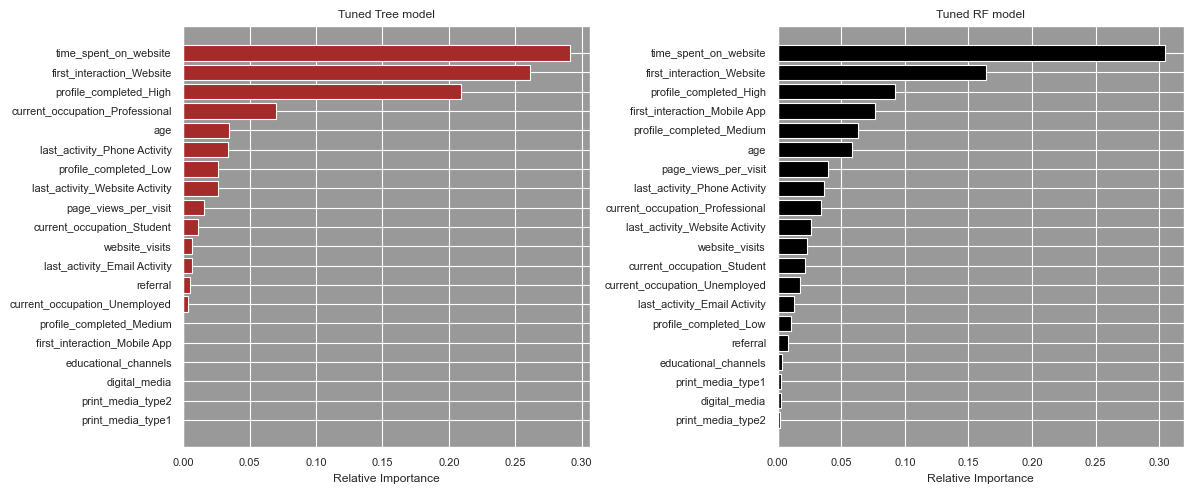

In [172]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.subplots_adjust(left=0.1, bottom=0.0, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
plt.title('Tuned Tree model')
plt.barh(range(len(indices_t)), importances_tree[indices_t], color = 'brown', align = 'center')
plt.yticks(range(len(indices_t)), [features[i] for i in indices_t])
plt.xlabel('Relative Importance')
plt.subplot(1, 2, 1)

 
plt.subplot(1, 2, 2)
plt.title('Tuned RF model')
plt.barh(range(len(indices)), importances[indices], color = 'black', align = 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

plt.tight_layout()
plt.show()

<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
    
 - RF model found more features of importance than the tree model. 
 - Top THREE features of importances are same on these models. 
 - Tree model did not give any importances to print_media_type1, print_media_type2, digital_media, first_interaction_mobile and educational_channels.   
    Where as RF models given some importances.   
 - feature importance of current_occupation_Professional is very high in tree model compared to RF.
** ** 

## Model Selection

<div style="background-image: linear-gradient(rgb(10,289,55), white);font-family: 'Segoe UI';font-size:'25'">


You can see below   
    
Tuned **random forest** model gave us best **f1-score** on **both** train and test data compared to tuned **tree model** which is at close 2nd.   
Also , **precission** and **recall** scores are above 80%.
    
    
    
Final model **model_4_randomF_tuned** with these hyperparameters.     
    
- class_weight=balanced   
- criterion=entropy    
- max_depth=7   
- max_features=0.5   
- n_estimators=260    
- random_state=7    
    
We could choose either of these models. RF model took lots of time. 

In [1]:
metrics_df.iloc[::-1].style.apply(lambda x: ['background: lightblue' if (x.name == 7 or x.name == 6) else '' for i in x], axis=1)

NameError: name 'metrics_df' is not defined

In [174]:
rf_estimator_tuned_base.fit(X, Y)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features=0.5, n_estimators=260,
                       random_state=7)

                          
                          MODEL SCORES
                          
                model_id train_or_test  f1-score  precision    recall
8    Model_RandomF_tuned         Final  0.859578   0.847437  0.878896
7  model_4_randomF_tuned          Test  0.826310   0.816186  0.841230
6  model_4_randomF_tuned         Train  0.866546   0.855015  0.883954
5   model_3_randomF_orig          Test  0.817990   0.831361  0.807748
4   model_3_randomF_orig         Train  1.000000   1.000000  1.000000
3     model_2_tree_tuned          Test  0.816881   0.804461  0.846558
2     model_2_tree_tuned         Train  0.825392   0.813372  0.854064
1      model_1_tree_orig          Test  0.754269   0.754638  0.753905
0      model_1_tree_orig         Train  1.000000   1.000000  1.000000
                                
                         CONFUSION MATRIX


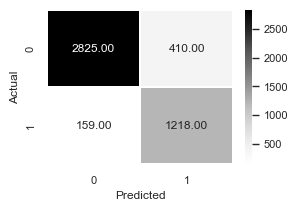

,model_id,train_or_test,f1-score,precision,recall
8,Model_RandomF_tuned,Final,0.859578,0.847437,0.878896
7,model_4_randomF_tuned,Test,0.826310,0.816186,0.841230
6,model_4_randomF_tuned,Train,0.866546,0.855015,0.883954
5,model_3_randomF_orig,Test,0.817990,0.831361,0.807748
4,model_3_randomF_orig,Train,1.000000,1.000000,1.000000
3,model_2_tree_tuned,Test,0.816881,0.804461,0.846558
2,model_2_tree_tuned,Train,0.825392,0.813372,0.854064
1,model_1_tree_orig,Test,0.754269,0.754638,0.753905
0,model_1_tree_orig,Train,1.000000,1.000000,1.000000


In [175]:
Y_final = rf_estimator_tuned_base.predict(X)
metrics_df = metrics_score(metrics_df, 'Model_RandomF_tuned','Final',Y, Y_final)
metrics_df.iloc[::-1].style.apply(lambda x: ['background: lightgreen' if (x.name == 8) else '' for i in x], axis=1)

<div style="background-image: linear-gradient(rgb(10,289,55), white);font-family: 'Segoe UI';font-size:'25'">


The **Final** model is giving us a f1-score of approx **.86**, which is impressive. 

Predictions from this model can be **very reliable**. 
     
    

## Actionable Insights and Recommendations

<div style="background-image: linear-gradient(white, rgb(10,289,55));font-family: 'Segoe UI';font-size:'25'">


### Conclusions
We have built **four** decission tree based models, out of those **two** are fine tuned.   
    
* We performed EDA using univariate and multivalriate analysis and obtained very usefull insights from the features. 
* We applied treatment on features with outliers. 
* decision  tree and random forest base (not tuned) models were overfitting on the training data.
* After applying tuning to these models their perfomance improved and given a balanced scores on both    
  train and test datasets giving more **generalized** results. 
* All models performances are **captured** and **evaluated.**   
* We selected **model_4_randomF_tuned** as the **final** model based on it's f1-score, precission and recall statistics.  

    Performance of the **FINAL** model:  **f1-score**: 0.859578	**precission**: 0.847437	**recall**: 0.878896
    
   These are very good numbers for a model, and can be relied to make predictions to meat our objective to find profiles    
    of the leads most likely convert to the possitive class. i.e converting into a **paid customer**.

<div style="background-image: linear-gradient(white, rgb(10,289,55));font-family: 'Segoe UI';font-size:'25'">


### Recommendations

**ExtraaLearn,** should develop strategies based on **feature importances** and **insights**.
  
1. **time_spent_on_website:**   As per the modele prediction, this feaure is the most impactful
    , leads spending more time likely   
    converting to paid customers.
    - ExtraaLearn should put more information on the websites and   
    - Mordenize with instant support features such as online support. 
    - allow people to ask questions. and improve processes to respond quickly.   
      
2. **first_interaction_Website:**  You can see this is one of the top three feaures of importance.  
    
    - ExtraaLearn should increase advertizing on internet for its websites to get more hits.   
    
3. **profile_completed_High:** capuring more details about a prospect increase the chances of conversion.  
    
    - ExtraaLearn, should assist and encourage people to complete profile creation.    
    
4. **referrals:**  has highest coversion rate of  67.7%. But very few leads(2%) are generated from this. 
    - ExtraaLearn should put extra effort to engage its alumni and people and agencies connected to them   
      and insentivize and encourage to refer to their contacts.   
    
4. **first_interaction_Mobile App:** Leads are also using mobile apps to learn about ExtraaLearn's offerings. 
    - ExtraaLearn, may consider enhancing the mobile app and make it user friendly and attactive. 
    
5. **print_media_type1 and print_media_type2:** Print media slowly loosing it's influece in society. We are witnessing this. Model predicted this feature is among least feature importances.  
    
    - ExtraaLearn, may lower advertising in print media and divert ad-spending on internet to promote company website. 
    
6. **current_occupation:**
    Professionals and unemployed are showing highest interest. Student's interest is very low.  
   - ExtraaLearn may have courses more suitabe to professionals.
   - ExtraaLearn should continue to reachout to professionals and unemployed. 
   - Design new courses and contents more suitble to students and offer some discount. 

<div style="background-image: linear-gradient(white, rgb(210,89,55));font-family: 'Segoe UI';font-size:'25'">

##  ____________________________________________ THE END ______________________________________________